In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import cv2
import pandas as pd
import idx2numpy
import os
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
#importing necessary files

In [4]:
x_tr=idx2numpy.convert_from_file("train-images-fashion")
y_tr=idx2numpy.convert_from_file("train-labels-fashion")
x_te=idx2numpy.convert_from_file("test-images-fashion")
y_te=idx2numpy.convert_from_file("test-labels-fashion")
#converting dataset into numpy array

In [6]:
X = np.concatenate((x_tr, x_te), axis=0)
y = np.concatenate((y_tr, y_te), axis=0)
#concatenating train and test so that we can do 70 10 20 split

In [8]:
X = X.reshape(70000, 784)
X.shape
#converting 3D array to 2D

(70000, 784)

In [9]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
#standardizing values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)
#applying 70 10 20 split

In [12]:
pca_b = PCA(200)
X_train=pca_b.fit_transform(X_train)
sum(pca_b.explained_variance_ratio_)

X_train.shape
#applying PCA for dimensionality reduction

(49000, 200)

In [13]:
sample = X_train[:7000]
#taking a small set of data

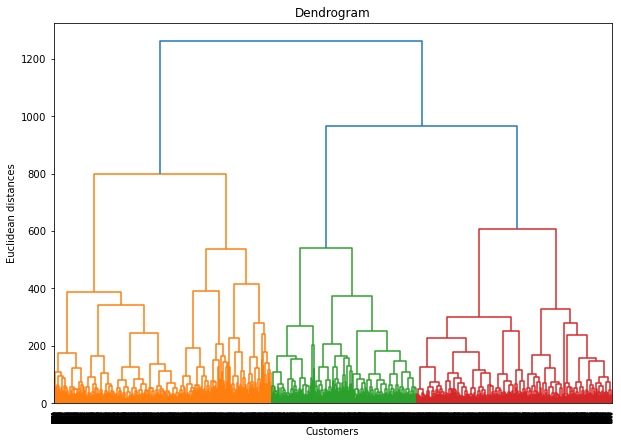

In [15]:
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(sample, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()
#making dendrogram to see hierarical relationship 

In [16]:
n_samples = 7000
x_tr2 = x_tr[:7000]


In [20]:
AC = AgglomerativeClustering()
AC_train = AC.fit(x_tr2.reshape(7000,784))
#applying hierarical clustering

In [22]:
print("train set silhouette metrics:",silhouette_score(X=x_tr2.reshape(7000,784),labels=AC_train.labels_))
# The Silhouette Coefficient is calculated using the mean intra-cluster
# distance (``a``) and the mean nearest-cluster distance (``b``) for each
# sample.

train set silhouette metrics: 0.16093208541485474


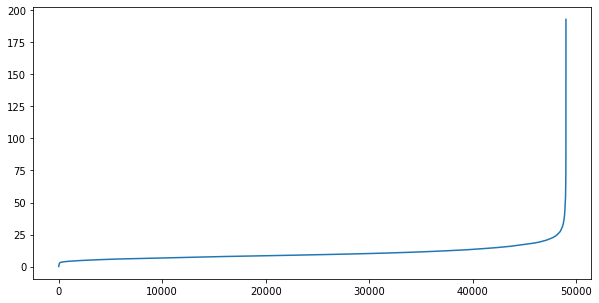

In [23]:
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(X_train)
distances, idx = nn.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()
#finding best value for eps for DBScan

To find a suitable value for eps, we can plot the points’ kNN distances (i.e., the distance of each point to its k-th nearest neighbor) in decreasing order and look for a knee in the plot. The idea behind this heuristic is that points located inside of clusters will have a small k-nearest neighbor distance, because they are close to other points in the same cluster, while noise points are more isolated and will have a rather large kNN distance.

We need a cutoff to decide what k-NN distance is considered "small" and what is "large." The knee heuristic identifies such a cutoff for epsilon as the k-NN distance where the distance starts to increase rapidly.

In [ ]:
cluster = DBSCAN(eps=22.9, min_samples=3).fit(X_train)
#density based clustering on train

In [25]:
cluster1 = DBSCAN(eps=22.9, min_samples=3).fit(X_test)
#density based clustering on train

In [26]:
print("train set silhouette metrics:",silhouette_score(X=X_train,labels=cluster.labels_))

train set silhouette metrics: 0.17383896540795452


In [27]:
print("train set silhouette metrics:",silhouette_score(X=X_test,labels=cluster1.labels_))

train set silhouette metrics: 0.057998736751749366


In [31]:
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True
labels = cluster.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_noise_,n_clusters_)
#checking number of clusters and noise in train

1297 10


In [32]:
core_samples_mask = np.zeros_like(cluster1.labels_, dtype=bool)
core_samples_mask[cluster1.core_sample_indices_] = True
labels = cluster1.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_noise_,n_clusters_)
#checking number of clusters and noise in test

1107 10


In [30]:
set(labels)
#checking all labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

According to me, Hierarical Based clustering would be better for above dataset as we are interested in finding all the 10 clusters. Because, When we all you know is that you can probably break up your dataset into that many distinct groups at the top level, but you might also be interested in the groups inside your groups, or the groups inside of those groups. To get that kind of structure, we use hierarchical clustering. Hierarchical clustering is advantageous for understanding any hidden structures in your data.

Whereas, in Density-Based clustering instead of assuming that every point is part of some cluster, we only look at points that are tightly packed and assume everything else is noise.So, it may not find all the 10 clusters.
